<a href="https://colab.research.google.com/github/gregodprogrammer/PenguineML/blob/main/penguine_gender_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Step 1:Setting up your Environment**

### **Importing the necessary Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix

## **Step 2:Load the Dataset**

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/penguins_size.csv')
df = df.dropna() # removing missing values
df.head() # Displaying the first few rows of the dataset


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## **Step 3:Prepare the Data**
### **Machine learning models can’t work with text directly, so we need to convert the categorical columns (like species, island, and sex) into numeric values.**

In [18]:
label_enc = LabelEncoder()
## Encoding 'species', 'island', and 'sex'
df['species'] = label_enc.fit_transform(df['species'])
df['island'] = label_enc.fit_transform(df['island'])
df['sex'] = label_enc.fit_transform(df['sex'])

# Now that the categorical columns are encoded, split the data
x = df.drop('sex',axis=1)  # Features (everything except the 'sex' column)
y = df['sex'] # Target (label we want to predict)

### **Splitting our data into features(x) and target label(y)**

In [19]:
y = df['sex'] # Target (label we want to ppredict)
y

,sex
0,2
1,1
2,1
4,1
5,2
...,...
338,1
340,1
341,2
342,1


In [20]:
x = df.drop('sex',axis=1)  # Features (everything except the 'sex' column)
x

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,2,39.1,18.7,181.0,3750.0
1,0,2,39.5,17.4,186.0,3800.0
2,0,2,40.3,18.0,195.0,3250.0
4,0,2,36.7,19.3,193.0,3450.0
5,0,2,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0
340,2,0,46.8,14.3,215.0,4850.0
341,2,0,50.4,15.7,222.0,5750.0
342,2,0,45.2,14.8,212.0,5200.0


### **Splitting the Data into Training and Testing sets**

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=69)

## **Step 4: Train the Model**
### We’re using a machine-learning algorithm called Random Forest. It’s easy to use and powerful, especially for beginners.

In [21]:
# initialize the Random Forest Classifier
clf = RandomForestClassifier()

# Train the Classifier on the Training Data
clf.fit(x_train, y_train)

RandomForestClassifier()

## **Step 5: feature Importance**
### Let’s visualize the importance of different features. This helps us understand which features (like body mass or beak length) contribute most to predicting the penguin’s sex.

Text(0.5, 1.0, 'Features Importance plot')

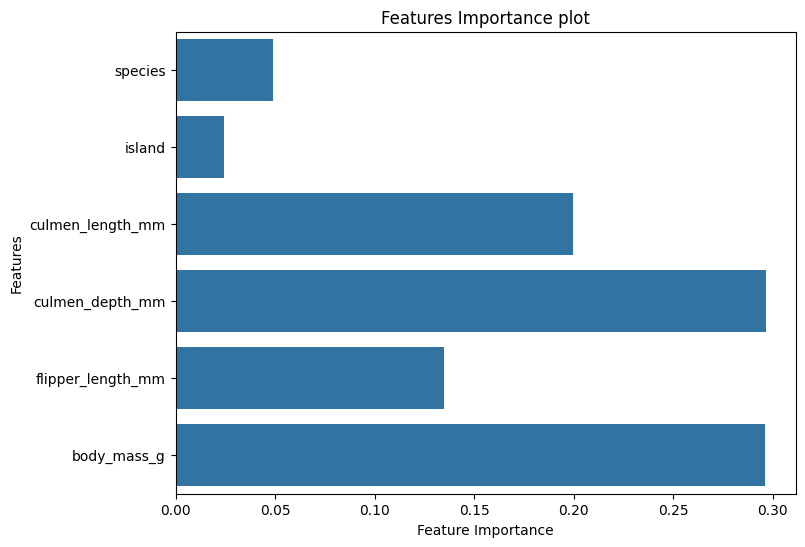

In [23]:
# Get Feature Importance
feature_importances = clf.feature_importances_
features = x.columns

# plotting the feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances,y=features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Features Importance plot')

## **Step 6: Make Predictions**
### Now that our model is trained, we can make predictions on the test data.

In [24]:
# Making Predictions
y_pred = clf.predict(x_test)

## **Step 7: Evaluate the Model**
### Let’s check how well our model did by calculating its accuracy. We can also plot a confusion matrix, which shows how many predictions were correct or incorrect.

In [25]:
# calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy * 100:.2f}%")

accuracy: 89.55%


## **Step 8: confusion Matrix**
### Finally, we’ll visualize the confusion matrix to see how many correct and incorrect predictions our model made. A confusion matrix is an excellent tool for evaluating classification models:

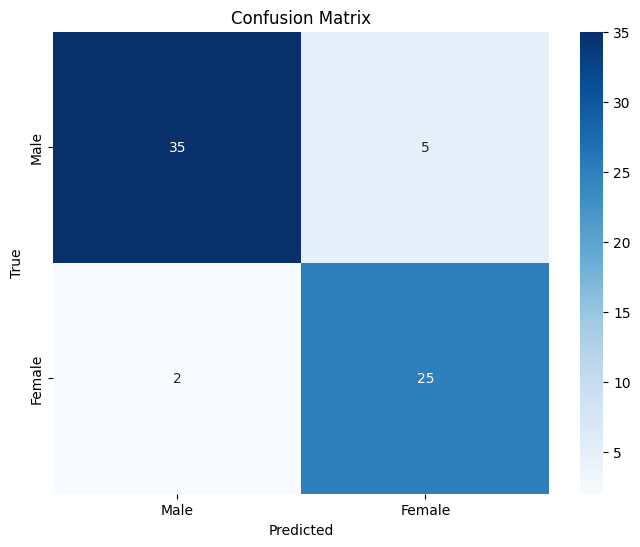

In [26]:
# plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Conclusion

In this tutorial, we built a Random Forest classifier to predict the sex of penguins based on their physical attributes. By following the steps of loading data, encoding categorical variables, splitting the dataset, training the model, and evaluating it, we were able to create a strong classification model with an accuracy of nearly 90%. This process highlights the power and simplicity of Random Forest, making it a go-to choice for many classification tasks.